In [1]:
import os
from scipy.io import loadmat
from sklearn.datasets.base import get_data_home
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier

In [19]:
#mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"

In [2]:
def getMnist():
    raw_data = loadmat(os.path.join(get_data_home(), "mnist-original.mat"))
    return {
        "data": raw_data["data"].T,
        "target": raw_data["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }

In [3]:
mnist = getMnist()

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

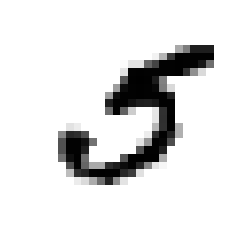

In [25]:
some_digit = X[36000]
some_digit_image = some_digits.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
y[36000]

5.0

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [11]:
y_train_5 = (y_train == 5)

In [12]:
y_test_5 = (y_test == 5)

In [13]:
y_train_5, y_test_5

(array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]))

In [14]:
sgd_clf = SGDClassifier(random_state=42)

In [15]:
sgd_clf.fit(X_train, y_train_5)

c:\dev\rdata_science\env\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
sgd_clf.predict([some_digit])

array([ True])

In [29]:
from sklearn.model_selection import cross_val_predict

In [30]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

c:\dev\rdata_science\env\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\dev\rdata_science\env\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\dev\rdata_science\env\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [31]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_train_5, y_train_pred)

array([[50392,  4187],
       [  551,  4870]], dtype=int64)

In [34]:
from sklearn.metrics import precision_score, recall_score

In [35]:
precision_score(y_train_5, y_train_pred)

0.5377056420448272

In [37]:
recall_score(y_train_5, y_train_pred)

0.8983582364877329

In [38]:
from sklearn.metrics import f1_score

In [39]:
f1_score(y_train_5, y_train_pred)

0.6727448542616383

In [40]:
y_scores = sgd_clf.decision_function([some_digit])

In [41]:
y_scores

array([52342.21480472])

In [42]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [43]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

c:\dev\rdata_science\env\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\dev\rdata_science\env\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\dev\rdata_science\env\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [44]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

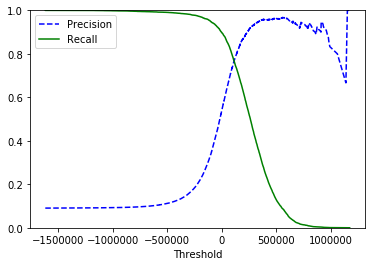

In [45]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()